Reference:
India Shapefile: https://geodata.lib.utexas.edu/catalog/stanford-mw277wc3858

Link for GeoJSON file of india's boundaries : https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson

In [1]:
!pip install geopandas
!pip install cartopy
!pip install shapely
!pip install pyshp
!pip install --no-binary shapely shapely --force

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 102.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 87.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 81.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 KB 5.5 MB/s eta 0:00:00
  Created wheel for cartopy: filename=Cartopy-0.21.1-cp39-cp39-linux_x86_64.whl size=11113668 sha256=54bb53e0736ec3a0c9ee4ed646b2780eabc304c606e326d6cd7e638486cabe0f
  Stored in directory: /root/.cache/pip/wheels/74/b9/f5/2c94acd7cd21480e6cf63169144d7aac3e8d9cf63822

In [2]:
!pip install chart-studio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 KB 5.3 MB/s eta 0:00:00


In [3]:
!pip install folium mapclassify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##Q1: Draw the map of India and use a bubble map to show the populations of all the state capitals of India.

##Importing Datasets

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as geopandas
import shapefile as shp
from shapely.geometry import Point
import cartopy.crs as ccrs
import cartopy.feature as cfeature
sns.set_style('whitegrid')

In [6]:
ind = geopandas.read_file('https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson')
print("Geometry Column Name : ", ind.geometry.name)
print("Dataset Size : ", ind.shape)
ind.head()

Geometry Column Name :  geometry
Dataset Size :  (36, 2)


,ST_NM,geometry
0,Arunachal Pradesh,"POLYGON ((95.23392 26.68246, 95.23282 26.70579..."
1,Assam,"POLYGON ((95.19465 27.03132, 95.15008 26.99934..."
2,Chandigarh,"POLYGON ((76.83806 30.75487, 76.83301 30.73887..."
3,Karnataka,"POLYGON ((77.55144 18.29191, 77.57026 18.29252..."
4,Manipur,"POLYGON ((94.67545 25.44561, 94.67293 25.42398..."


<Axes: >

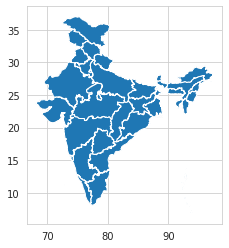

In [7]:
ind.plot()

In [8]:
data = pd.read_csv('/content/drive/MyDrive/DV_Lab3/in.csv')
df = data[data["capital"]=="admin"]
df.head()

,city,lat,lng,country,iso2,admin_name,capital,population,population_proper
0,Amaravathi,16.5131,80.5165,India,IN,Andhra Pradesh,admin,87486.0,87486.0
1,Port Blair,11.6667,92.7500,India,IN,Andaman and Nicobar Islands,admin,127562.0,112050.0
2,Itanagar,27.1000,93.6200,India,IN,Arunachal Pradesh,admin,59490.0,59490.0
3,Dispur,26.1500,91.7700,India,IN,Assam,admin,957352.0,957352.0
4,Patna,25.6100,85.1414,India,IN,Bihar,admin,1684222.0,1684222.0


In [9]:
SCALE = 5000
FONT = 15

In the below graph, I have manually changed the text positions of the names of cities, since they were getting covered by the bubbles.

In [10]:
for i in range(len(df)):
    if df["city"][i]=="Aizawl":
        df["lat"][i]=df["lat"][i] - 0.5  
    elif df["city"][i]=="Shillong":
        df["lng"][i]= df["lng"][i] - 1

<ipython-input-10-1f5ddf0e43c0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["lng"][i]= df["lng"][i] - 1
<ipython-input-10-1f5ddf0e43c0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["lat"][i]=df["lat"][i] - 0.5


In [ ]:
'''
px = plt.axes(projection=ccrs.PlateCarree())
ind.plot(ax=px, facecolor='lightyellow', edgecolor='black')
px.set_extent([68, 98, 6, 38], crs=ccrs.PlateCarree())


for i in range (len(df)):
    plt.scatter(x=[df["lng"][i]], y=[df["lat"][i]], color="blue", s=df["population"][i]/SCALE,alpha=0.7, e
'''

In [ ]:
pops=list(df["population"])
pops.sort()
pops

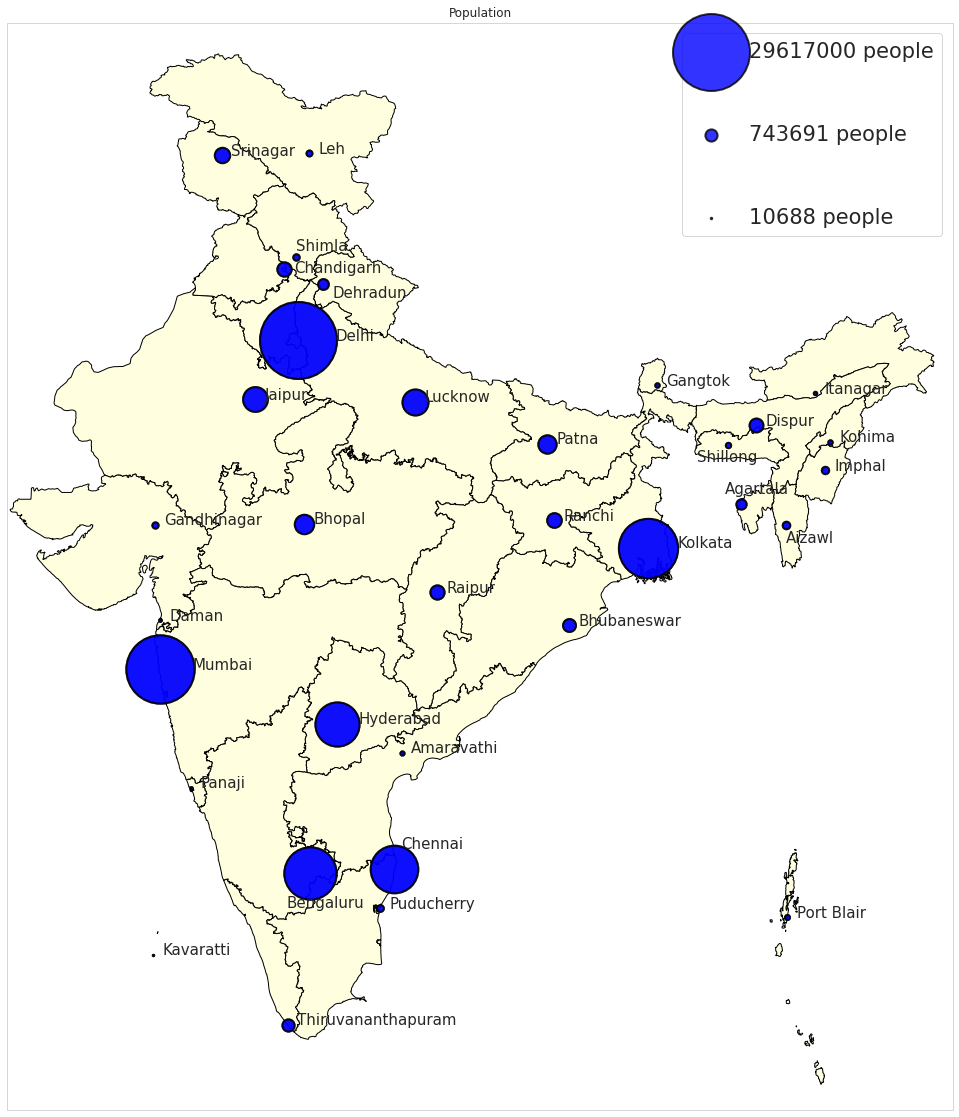

In [17]:
plt.figure(figsize=(20,20)) 

# Plot the data using Cartopy and Matplotlib
px = plt.axes(projection=ccrs.PlateCarree())
ind.plot(ax=px, facecolor='lightyellow', edgecolor='black')
px.set_extent([68, 98, 6, 38], crs=ccrs.PlateCarree())


for i in range (len(df)):
    plt.scatter(x=[df["lng"][i]], y=[df["lat"][i]], color="blue", s=df["population"][i]/SCALE,alpha=0.7, edgecolors="black", linewidth=2, transform=ccrs.PlateCarree())

    if df["population"][i]==pops[0] or df["population"][i]==pops[-1] or df["population"][i]==pops[len(pops)//2]:
        plt.scatter(x=[df["lng"][i]], y=[df["lat"][i]], color="blue", s=df["population"][i]/5000,alpha=0.8, edgecolors="black", linewidth=2, transform=ccrs.PlateCarree(),label=str(int(df["population"][i]))+' people')
    else:
        plt.scatter(x=[df["lng"][i]], y=[df["lat"][i]], color="blue", s=df["population"][i]/5000,alpha=0.8, edgecolors="black", linewidth=2, transform=ccrs.PlateCarree())
    #Writing text beside bubble
    if df["city"][i]=="Aizawl":
        plt.text(df["lng"][i], df["lat"][i]-0.5, df["city"][i], horizontalalignment='left',transform=ccrs.PlateCarree(),fontsize=FONT)    
    elif df["city"][i]=="Shillong":
        plt.text(df["lng"][i]-1, df["lat"][i]-0.5, df["city"][i], horizontalalignment='left',transform=ccrs.PlateCarree(),fontsize=FONT)
    elif df["city"][i]=="Delhi":
        plt.text(df["lng"][i]+1.8, df["lat"][i], df["city"][i], horizontalalignment='center',transform=ccrs.PlateCarree(),fontsize=FONT) 
    elif df["city"][i]=="Chennai":
        plt.text(df["lng"][i]+1.2, df["lat"][i]+0.6, df["city"][i], horizontalalignment='center',transform=ccrs.PlateCarree(),fontsize=FONT)
    elif df["city"][i]=="Shimla":
        plt.text(df["lng"][i], df["lat"][i]+0.2, df["city"][i], horizontalalignment='left',transform=ccrs.PlateCarree(),fontsize=FONT)
    elif df["city"][i]=="Dehradun":
        plt.text(df["lng"][i]+0.3, df["lat"][i]-0.4, df["city"][i], horizontalalignment='left',transform=ccrs.PlateCarree(),fontsize=FONT)
    elif df["city"][i]=="Mumbai":
        plt.text(df["lng"][i]+2, df["lat"][i], df["city"][i], horizontalalignment='center',transform=ccrs.PlateCarree(),fontsize=FONT)
    elif df["city"][i]=="Kolkata":
        plt.text(df["lng"][i]+1.8, df["lat"][i], df["city"][i], horizontalalignment='center',transform=ccrs.PlateCarree(),fontsize=FONT)
    elif df["city"][i]=="Bengaluru":
        plt.text(df["lng"][i]+0.5, df["lat"][i]-1, df["city"][i], horizontalalignment='center',transform=ccrs.PlateCarree(),fontsize=FONT)
    elif df["city"][i]=="Hyderabad":
        plt.text(df["lng"][i]+2, df["lat"][i], df["city"][i], horizontalalignment='center',transform=ccrs.PlateCarree(),fontsize=FONT)
    elif df["city"][i]=="Chandigarh":
        plt.text(df["lng"][i]+0.3, df["lat"][i]-0.1, df["city"][i], horizontalalignment='left',transform=ccrs.PlateCarree(),fontsize=FONT)
    elif df["city"][i]=="Agartala":
        plt.text(df["lng"][i]-0.5, df["lat"][i]+0.3, df["city"][i], horizontalalignment='left',transform=ccrs.PlateCarree(),fontsize=FONT)
  
    else:    
        plt.text(df["lng"][i]+0.3, df["lat"][i], df["city"][i], horizontalalignment='left',transform=ccrs.PlateCarree(),fontsize=15)


plt.legend(fontsize=21, labelspacing=3)
plt.title("Population")
plt.show()

##Trying Interactive plots for world population

In [ ]:
path = geopandas.datasets.get_path('naturalearth_lowres')
bord = geopandas.read_file(path)
bord.explore(column='pop_est',
             cmap='Set2',
             legend=False,
             tooltip=['name','pop_est'])

In [ ]:
bord.explore(column='pop_est',
             cmap='Set2',
             legend=False,
             tooltip=False,
             popup=['name','pop_est'])

##Q2:Draw the connection graph of Go Air domestic flights of India from the database

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/DV_Lab3/Flightschedule.xlsx")
df = df[df["Routing"]=="Non Stop"].reset_index()
df

,index,Origin,Destination,Flight Number,Departure Time,Arrival Time,Flight Time,Routing,Days Of Operations,Connection Flight No,Effective From,EffectiveTo
0,26,Abu Dhabi,Delhi,G8 76,21:40,02:40,03:30,Non Stop,Daily,-,2023-02-02,2023-03-25
1,42,Abu Dhabi,Kannur,G8 54,22:20,03:40,03:50,Non Stop,Daily,-,2023-02-02,2023-03-25
2,45,Abu Dhabi,Kochi,G8 64,23:30,05:00,04:00,Non Stop,"Tu,W,F,Su",-,2023-02-02,2023-02-22
3,61,Abu Dhabi,Mumbai,G8 6,23:30,04:10,03:10,Non Stop,Daily,-,2023-02-02,2023-02-05
4,123,Ahmedabad,Bengaluru,G8 802,09:25,11:25,02:00,Non Stop,Daily,-,2023-02-02,2023-02-06
...,...,...,...,...,...,...,...,...,...,...,...,...
369,3345,Varanasi,Bengaluru,G8 404,12:30,14:45,02:15,Non Stop,Sa,-,2023-02-02,2023-02-17
370,3346,Varanasi,Bengaluru,G8 404,12:30,14:45,02:15,Non Stop,"M,Tu,W,Th,F,Su",-,2023-02-02,2023-03-25
371,3350,Varanasi,Delhi,G8 183,18:40,20:05,01:25,Non Stop,Daily,-,2023-02-02,2023-02-15
372,3388,Varanasi,Mumbai,G8 350,13:50,16:10,02:20,Non Stop,Daily,-,2023-02-02,2023-02-15


In [ ]:
Destinations=df["Destination"].unique()
Destinations.sort()

In [ ]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="geoapiExercises")
Dest_lat_long={}
for i in Destinations:    
    location = geolocator.geocode(i)
    Dest_lat_long.update({i:[location.latitude, location.longitude]})


In [ ]:
path = geopandas.datasets.get_path('naturalearth_lowres')
bord = geopandas.read_file(path)

In [ ]:
bord

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


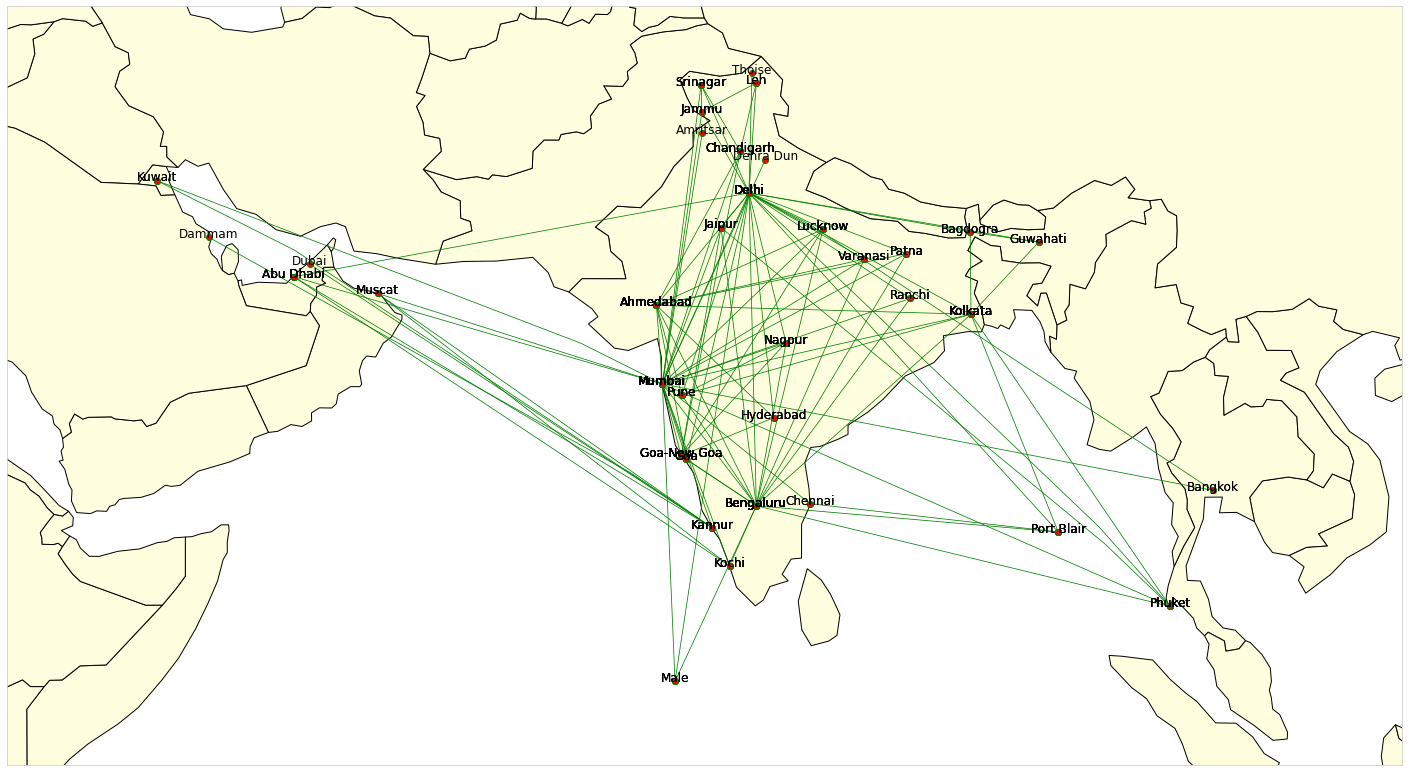

In [ ]:
unique_routes=[]
cities=[]
plt.figure(figsize=(25,25)) 

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([40, 110, 0, 38], crs=ccrs.PlateCarree())

bord.plot(ax=ax,facecolor='lightyellow', edgecolor='black' )


for i in range(len(df)):
    if [df["Origin"][i],df["Destination"][i]] not in unique_routes and [df["Destination"][i],df["Origin"][i]] not in unique_routes:
        unique_routes.append([df["Origin"][i],df["Destination"][i]])
        lat1, lon1 = Dest_lat_long[df["Origin"][i]][0], Dest_lat_long[df["Origin"][i]][1]
        lat2, lon2 = Dest_lat_long[df["Destination"][i]][0], Dest_lat_long[df["Destination"][i]][1]

        plt.plot([lon1, lon2], [lat1, lat2], linewidth=0.75, color="green", marker='o', markerfacecolor='red',transform=ccrs.Geodetic())
        plt.text(lon2, lat2, df["Destination"][i], color="black", fontsize=12, horizontalalignment="center",transform=ccrs.Geodetic()) 
        plt.text(lon1, lat1, df["Origin"][i], color="black", fontsize=12, horizontalalignment="center",transform=ccrs.Geodetic()) 




plt.show()
#thickness of text indicates the no of flights to and from that airport

Domestic Flights only

<ipython-input-63-823d9e199ee9>:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes(projection=ccrs.PlateCarree())


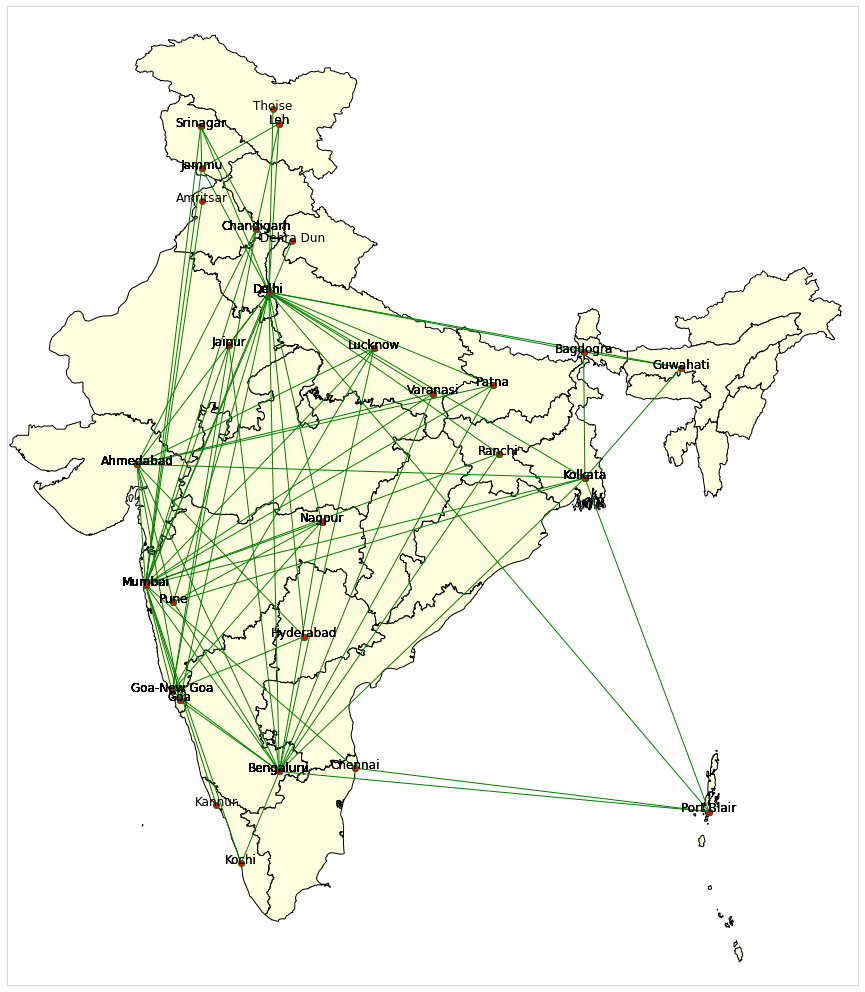

In [ ]:
gdf = geopandas.read_file("https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson")

plt.figure(figsize=(18,18)) 

# Plot the data using Cartopy and Matplotlib
px = plt.axes(projection=ccrs.PlateCarree())
gdf.plot(ax=px, facecolor='lightyellow', edgecolor='black')
px.set_extent([68, 98, 6, 38], crs=ccrs.PlateCarree())

unique_routes=[]
cities=[]

ax = plt.axes(projection=ccrs.PlateCarree())

for i in range(len(df)):
    lat1, lon1 = Dest_lat_long[df["Origin"][i]][0], Dest_lat_long[df["Origin"][i]][1]
    lat2, lon2 = Dest_lat_long[df["Destination"][i]][0], Dest_lat_long[df["Destination"][i]][1]

    if [df["Origin"][i],df["Destination"][i]] not in unique_routes and [df["Destination"][i],df["Origin"][i]] not in unique_routes and 68<lon1<98 and 68<lon2<98 and 6<lat1<37 and 6<lat2<37:
        unique_routes.append([df["Origin"][i],df["Destination"][i]])


        plt.plot([lon1, lon2], [lat1, lat2], linewidth=1, color="green", marker='o', markerfacecolor = 'red',transform=ccrs.Geodetic())

        plt.text(lon1, lat1, df["Origin"][i], color="black", fontsize=12, horizontalalignment="center",transform=ccrs.Geodetic()) 

        plt.text(lon2, lat2, df["Destination"][i], color="black", fontsize=12, horizontalalignment="center",transform=ccrs.Geodetic()) 

plt.show()

Frequency of unique routes

In [ ]:
b = Dest_lat_long

In [ ]:
unique_routes=[]
cities=[]
unique_routes_count=[]

for i in range(len(df)):
    lat1, lon1 = b[df["Origin"][i]][0], b[df["Origin"][i]][1]
    lat2, lon2 = b[df["Destination"][i]][0], b[df["Destination"][i]][1]

    if 68<lon1<98 and 68<lon2<98 and 6<lat1<37 and 6<lat2<37:
        if [df["Origin"][i],df["Destination"][i]] not in unique_routes and [df["Destination"][i],df["Origin"][i]] not in unique_routes:
            unique_routes.append([df["Origin"][i],df["Destination"][i]])
            unique_routes_count.append(1)

        else:
            if [df["Origin"][i],df["Destination"][i]] in unique_routes:
                unique_routes_count[unique_routes.index([df["Origin"][i],df["Destination"][i]])]+=1
            else:
                unique_routes_count[unique_routes.index([df["Destination"][i],df["Origin"][i]])]+=1




Routes having more than 3 flights

<ipython-input-61-02a71956314c>:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes(projection=ccrs.PlateCarree())


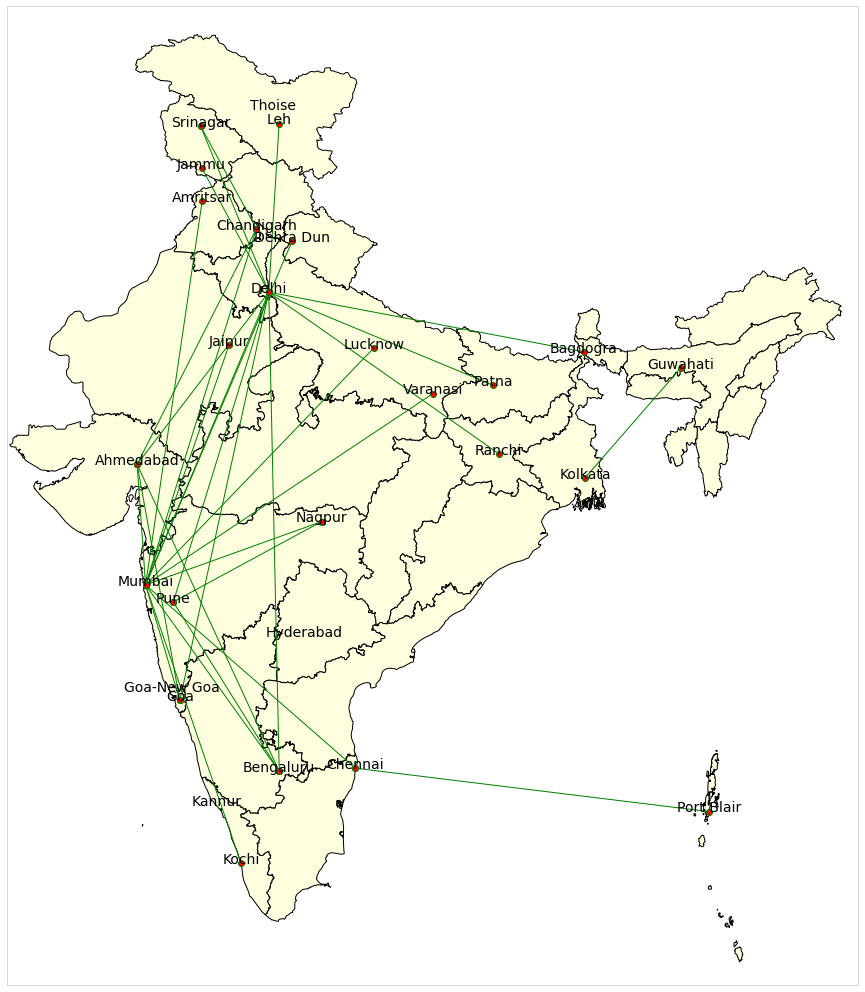

In [ ]:
gdf = geopandas.read_file("https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson")

plt.figure(figsize=(18,18)) 

# Plot the data using Cartopy and Matplotlib
px = plt.axes(projection=ccrs.PlateCarree())
gdf.plot(ax=px, facecolor='lightyellow', edgecolor='black')
px.set_extent([68, 98, 6, 38], crs=ccrs.PlateCarree())

cities=[]

ax = plt.axes(projection=ccrs.PlateCarree())

for i in range(len(unique_routes)):
    lat1, lon1 = b[unique_routes[i][0]][0], b[unique_routes[i][0]][1]
    lat2, lon2 = b[unique_routes[i][1]][0], b[unique_routes[i][1]][1]

    if unique_routes_count[i]>3:    
        plt.plot([lon1, lon2], [lat1, lat2], linewidth=1, color="green", marker='o', markerfacecolor='red',transform=ccrs.Geodetic())


    if unique_routes[i][0] not in cities:
        cities.append(unique_routes[i][0])
        plt.text(lon1, lat1, unique_routes[i][0], color="black", fontsize=14, horizontalalignment="center",transform=ccrs.Geodetic()) 

    if unique_routes[i][1] not in cities:
        cities.append(unique_routes[i][1])
        plt.text(lon2, lat2, unique_routes[i][1], color="black", fontsize=14, horizontalalignment="center",transform=ccrs.Geodetic()) 


plt.show()